<a href="https://colab.research.google.com/github/epochee/project4/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_4_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

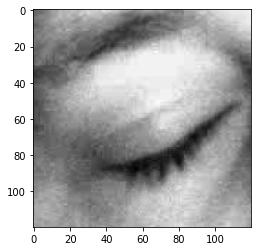

In [ ]:
image_gry = cv2.imread('/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png',cv2.IMREAD_GRAYSCALE) 
plt.imshow(image_gry,cmap='gray')

In [ ]:
image_gry.shape

(120, 120)

In [ ]:
image_rgb = cv2.cvtColor(image_gry,cv2.COLOR_GRAY2RGB) 

In [ ]:
image_rgb.shape

(120, 120, 3)

In [ ]:
import os

base_dir = '/content/drive/MyDrive/'

train_dir = os.path.join(base_dir, 'train')
train_cls_eye_dir = os.path.join(train_dir, 'Closed_Eyes')
train_opn_eye_dir = os.path.join(train_dir, 'Open_Eyes')

In [ ]:
print(len(os.listdir(train_cls_eye_dir)))
print(len(os.listdir(train_cls_eye_dir)))

2000
2000


In [ ]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(224, 224), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(224, 224), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
history = model.fit(train_data,
          validation_data = test_data, 
          callbacks=[early],
          epochs = 20)

Epoch 1/20
100/100 [==============================] - 864s 8s/step - loss: 6.9014 - accuracy: 0.8028 - val_loss: 0.1255 - val_accuracy: 0.9700
Epoch 2/20
100/100 [==============================] - 11s 105ms/step - loss: 0.1255 - accuracy: 0.9634 - val_loss: 0.1354 - val_accuracy: 0.9450
Epoch 3/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0925 - accuracy: 0.9719 - val_loss: 0.1332 - val_accuracy: 0.9613
Epoch 4/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0861 - accuracy: 0.9744 - val_loss: 0.0714 - val_accuracy: 0.9775
Epoch 5/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.1036 - val_accuracy: 0.9663
Epoch 6/20
100/100 [==============================] - 11s 104ms/step - loss: 0.0282 - accuracy: 0.9928 - val_loss: 0.0232 - val_accuracy: 0.9925
Epoch 7/20
100/100 [==============================] - 11s 103ms/step - loss: 0.0214 - accuracy: 0.9947 - val_loss: 0.0224 - val_accu

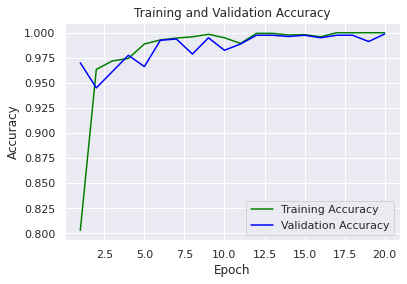

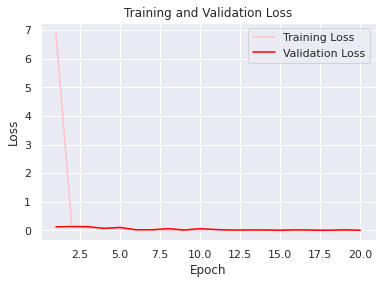

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
!wget -O lion.jpg https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA5MDRfMTQx%2FMDAxNTk5MTg2Mjc3NjYy.NyWpbZQ5zmSfXeFEG5AGdc_mXQEECOvm-tT5oiOQVMEg.TGCa1zmG3wDpkuu3aAiZ6fhYEfL-TZLE2KfJnLWOBXEg.JPEG.hongcha0425%2FEPA3JJ1100LBE_MDL2_H.jpg&type=sc960_832

import cv2

img = cv2.imread('/content/lion.jpg',cv2.IMREAD_UNCHANGED) 


--2021-09-03 03:42:45--  https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA5MDRfMTQx%2FMDAxNTk5MTg2Mjc3NjYy.NyWpbZQ5zmSfXeFEG5AGdc_mXQEECOvm-tT5oiOQVMEg.TGCa1zmG3wDpkuu3aAiZ6fhYEfL-TZLE2KfJnLWOBXEg.JPEG.hongcha0425%2FEPA3JJ1100LBE_MDL2_H.jpg
Resolving search.pstatic.net (search.pstatic.net)... 2.21.42.186
Connecting to search.pstatic.net (search.pstatic.net)|2.21.42.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218179 (213K) [image/jpeg]
Saving to: ‘lion.jpg’

lion.jpg            100%[===================>] 213.07K  --.-KB/s    in 0.04s   

2021-09-03 03:42:45 (4.94 MB/s) - ‘lion.jpg’ saved [218179/218179]



In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [ ]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

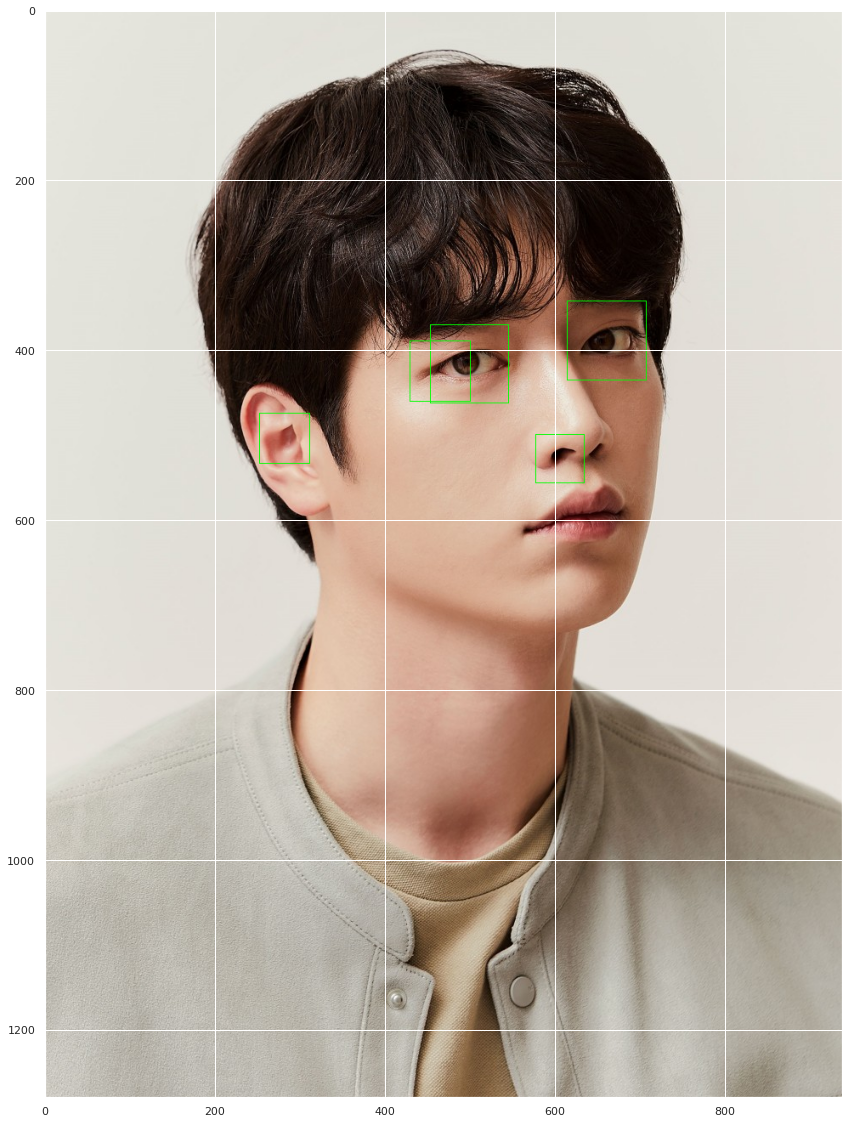

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

--2021-09-03 07:27:00--  https://cphoto.asiae.co.kr/listimglink/1/2018102618556720_1540566060.jpg
Resolving cphoto.asiae.co.kr (cphoto.asiae.co.kr)... 114.31.35.14
Connecting to cphoto.asiae.co.kr (cphoto.asiae.co.kr)|114.31.35.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19357 (19K) [image/jpeg]
Saving to: ‘lion3.jpg’

lion3.jpg           100%[===================>]  18.90K  --.-KB/s    in 0s      

2021-09-03 07:27:03 (151 MB/s) - ‘lion3.jpg’ saved [19357/19357]



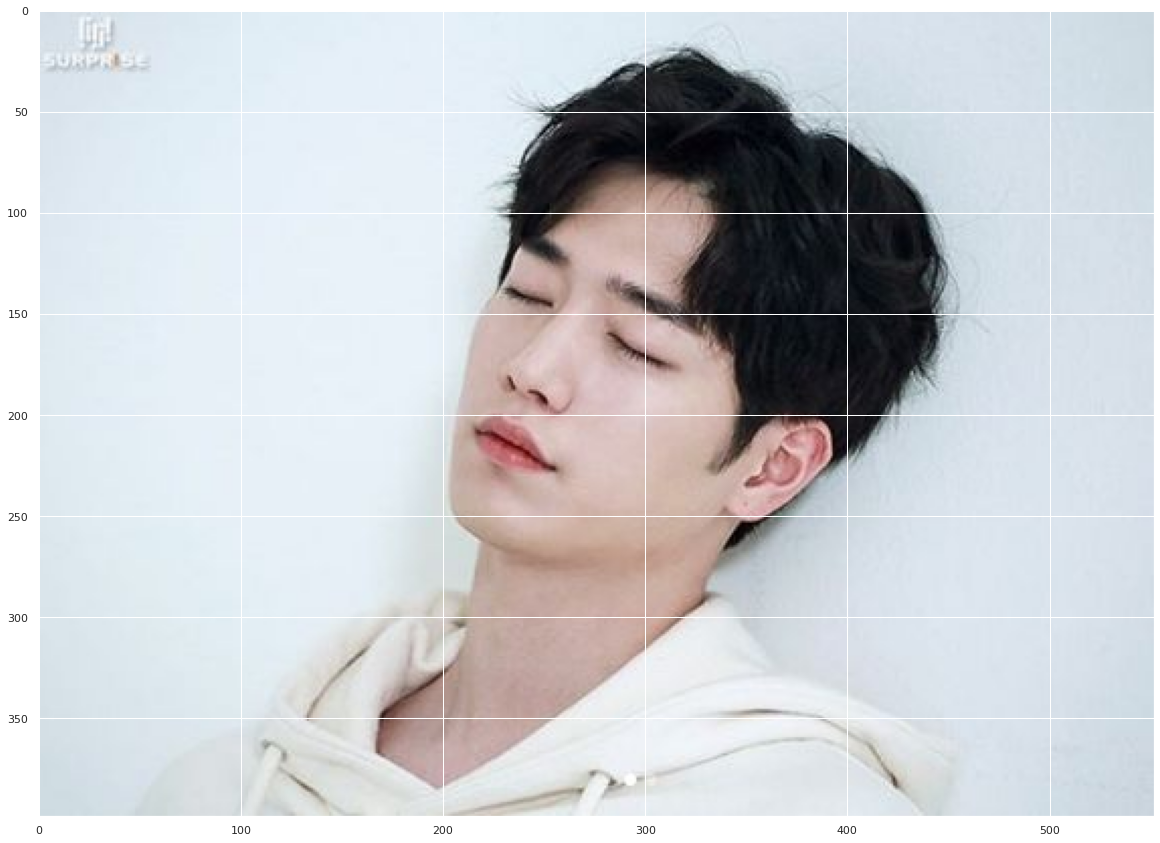

In [ ]:
!wget -O lion3.jpg https://cphoto.asiae.co.kr/listimglink/1/2018102618556720_1540566060.jpg
import cv2

img2 = cv2.imread('/content/lion3.jpg',cv2.IMREAD_UNCHANGED) 
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray2, 1.1, 30)
for (x, y, w, h) in eyes:
  cv2.rectangle(img2, (x,y), (x+w, y+h), (0, 255, 0), 1)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
eyes

array([[337, 109,  53,  53]], dtype=int32)

In [ ]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 30)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img2[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray, 1.1, 4)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

eyes not detected


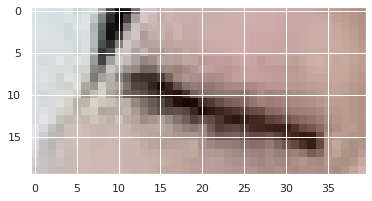

In [ ]:

plt.imshow(cv2.cvtColor(img2[130:150,220:260], cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi = img2[220:250,250:270]

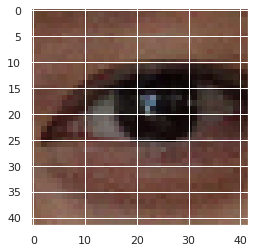

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(39, 39, 3)

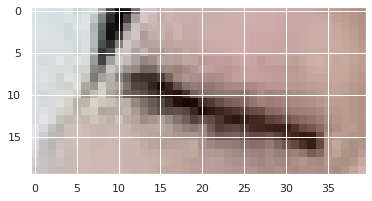

In [ ]:
plt.imshow(cv2.cvtColor(img2[130:150,220:260], cv2.COLOR_BGR2RGB))

In [ ]:
final_img = cv2.resize(img2[130:150,220:260], (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [ ]:
prediction = model.predict(final_img)

[[0.52223706]]
open


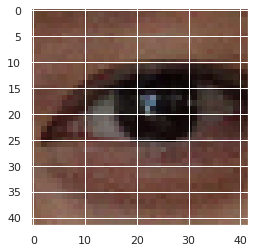

In [ ]:
class_names = {0:"closes",1:"open"}

print(prediction)
print(class_names[round(prediction[0][0])])
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

[[0.00025302]]
closes


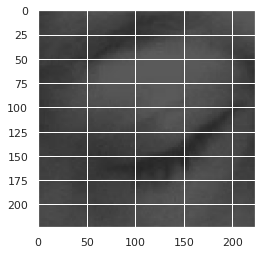

In [ ]:
image_path = '/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png'
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
print(class_names[round(prediction[0][0])])
plt.imshow(new_img)

In [ ]:
image_path

'/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png'

[[0.9906811]]
open


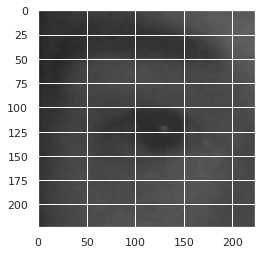

In [ ]:
image_path = "/content/drive/MyDrive/train/Open_Eyes/s0001_02339_0_0_1_0_0_01.png"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
print(class_names[round(prediction[0][0])])
plt.imshow(new_img)

In [ ]:
# from IPython.display import display, Javascript, Image
# from google.colab.output import eval_js
# from base64 import b64decode, b64encode
# import cv2
# import numpy as np
# import PIL
# import io
# import html
# import time

In [ ]:
# # function to convert the JavaScript object into an OpenCV image
# def js_to_image(js_reply):
#   """
#   Params:
#           js_reply: JavaScript object containing image from webcam
#   Returns:
#           img: OpenCV BGR image
#   """
#   # decode base64 image
#   image_bytes = b64decode(js_reply.split(',')[1])
#   # convert bytes to numpy array
#   jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
#   # decode numpy array into OpenCV BGR image
#   img = cv2.imdecode(jpg_as_np, flags=1)

#   return img

# # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
# def bbox_to_bytes(bbox_array):
#   """
#   Params:
#           bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
#   Returns:
#         bytes: Base64 image byte string
#   """
#   # convert array into PIL image
#   bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
#   iobuf = io.BytesIO()
#   # format bbox into png for return
#   bbox_PIL.save(iobuf, format='png')
#   # format return string
#   bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

#   return bbox_bytes

In [ ]:
# # initialize the Haar Cascade face detection model
# face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)

#   # get photo data
#   data = eval_js('takePhoto({})'.format(quality))
#   # get OpenCV format image
#   img = js_to_image(data) 
#   # grayscale img
#   gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#   print(gray.shape)
#   # get face bounding box coordinates using Haar Cascade
#   faces = face_cascade.detectMultiScale(gray)
#   # draw face bounding box on image
#   for (x,y,w,h) in faces:
#       img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#   # save image
#   cv2.imwrite(filename, img)

#   return filename

# try:
#   filename = take_photo('photo.jpg')
#   print('Saved to {}'.format(filename))
  
#   # Show the image which was just taken.
#   display(Image(filename))
# except Exception as err:
#   # Errors will be thrown if the user does not have a webcam or if they do not
#   # grant the page permission to access it.
#   print(str(err))

In [ ]:
# # JavaScript to properly create our live video stream using our webcam as input
# def video_stream():
#   js = Javascript('''
#     var video;
#     var div = null;
#     var stream;
#     var captureCanvas;
#     var imgElement;
#     var labelElement;
    
#     var pendingResolve = null;
#     var shutdown = false;
    
#     function removeDom() {
#        stream.getVideoTracks()[0].stop();
#        video.remove();
#        div.remove();
#        video = null;
#        div = null;
#        stream = null;
#        imgElement = null;
#        captureCanvas = null;
#        labelElement = null;
#     }
    
#     function onAnimationFrame() {
#       if (!shutdown) {
#         window.requestAnimationFrame(onAnimationFrame);
#       }
#       if (pendingResolve) {
#         var result = "";
#         if (!shutdown) {
#           captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
#           result = captureCanvas.toDataURL('image/jpeg', 0.8)
#         }
#         var lp = pendingResolve;
#         pendingResolve = null;
#         lp(result);
#       }
#     }
    
#     async function createDom() {
#       if (div !== null) {
#         return stream;
#       }

#       div = document.createElement('div');
#       div.style.border = '2px solid black';
#       div.style.padding = '3px';
#       div.style.width = '100%';
#       div.style.maxWidth = '600px';
#       document.body.appendChild(div);
      
#       const modelOut = document.createElement('div');
#       modelOut.innerHTML = "<span>Status:</span>";
#       labelElement = document.createElement('span');
#       labelElement.innerText = 'No data';
#       labelElement.style.fontWeight = 'bold';
#       modelOut.appendChild(labelElement);
#       div.appendChild(modelOut);
           
#       video = document.createElement('video');
#       video.style.display = 'block';
#       video.width = div.clientWidth - 6;
#       video.setAttribute('playsinline', '');
#       video.onclick = () => { shutdown = true; };
#       stream = await navigator.mediaDevices.getUserMedia(
#           {video: { facingMode: "environment"}});
#       div.appendChild(video);

#       imgElement = document.createElement('img');
#       imgElement.style.position = 'absolute';
#       imgElement.style.zIndex = 1;
#       imgElement.onclick = () => { shutdown = true; };
#       div.appendChild(imgElement);
      
#       const instruction = document.createElement('div');
#       instruction.innerHTML = 
#           '<span style="color: red; font-weight: bold;">' +
#           'When finished, click here or on the video to stop this demo</span>';
#       div.appendChild(instruction);
#       instruction.onclick = () => { shutdown = true; };
      
#       video.srcObject = stream;
#       await video.play();

#       captureCanvas = document.createElement('canvas');
#       captureCanvas.width = 640; //video.videoWidth;
#       captureCanvas.height = 480; //video.videoHeight;
#       window.requestAnimationFrame(onAnimationFrame);
      
#       return stream;
#     }
#     async function stream_frame(label, imgData) {
#       if (shutdown) {
#         removeDom();
#         shutdown = false;
#         return '';
#       }

#       var preCreate = Date.now();
#       stream = await createDom();
      
#       var preShow = Date.now();
#       if (label != "") {
#         labelElement.innerHTML = label;
#       }
            
#       if (imgData != "") {
#         var videoRect = video.getClientRects()[0];
#         imgElement.style.top = videoRect.top + "px";
#         imgElement.style.left = videoRect.left + "px";
#         imgElement.style.width = videoRect.width + "px";
#         imgElement.style.height = videoRect.height + "px";
#         imgElement.src = imgData;
#       }
      
#       var preCapture = Date.now();
#       var result = await new Promise(function(resolve, reject) {
#         pendingResolve = resolve;
#       });
#       shutdown = false;
      
#       return {'create': preShow - preCreate, 
#               'show': preCapture - preShow, 
#               'capture': Date.now() - preCapture,
#               'img': result};
#     }
#     ''')

#   display(js)
  
# def video_frame(label, bbox):
#   data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
#   return data

In [ ]:
# # start streaming video from webcam
# video_stream()
# # label for video
# label_html = 'Capturing...'
# # initialze bounding box to empty
# bbox = ''
# count = 0 
# while True:
#     js_reply = video_frame(label_html, bbox)
#     if not js_reply:
#         break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480,640,4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     # get face region coordinates
#     # faces = face_cascade.detectMultiScale(gray)
#     eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     eyes = eyeCascade.detectMultiScale(gray)
#     for (x,y,w,h) in eyes:
#       bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

#     bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)
#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes